# Load Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Twitter/Panas/Data/Eng_panas.csv')
df = pd.DataFrame(df)

In [3]:
df.drop(columns =['Unnamed: 0'], inplace=True)
df.head()

,stemmed_sentence,tweet_eng
0,keren berita portal sorot haters wkwkwkwk panas,cool news portal highlight haters hot wkwkwkwk
1,unisex parfume anti bau apek panas panas san a...,unisex perfume anti-odor musty hot hot san a t...
2,bad mood panas,bad hot mood
3,makan sen youngk pc bang jjagyechi jajangmyeom...,eat sen youngk pc bang jjagyechi jajangmyeom e...
4,guys tangan ibu kayak lepuh kena apipanas,guys mom's hands are like blisters with apipanas


In [4]:
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

# Labeling

In [5]:
import preprocessor as pp
from textblob import TextBlob
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Text Blob

In [6]:
data = list(df['tweet_eng'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, tweet in enumerate(data):
  analysis = TextBlob(tweet)
  polaritas += analysis.polarity

  if analysis.sentiment.polarity > 0.0:
    total_positif += 1
    status.append('Positif')
  elif analysis.sentiment.polarity == 0.0:
    total_netral += 1
    status.append('Netral')
  else:
    total_negatif += 1
    status.append('Negatif')
  total +=1

In [7]:
print(f'Hasil Analisis Data:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif : {total_negatif}')
print(f"Total Data : {total}")

Hasil Analisis Data:
Positif = 43
Netral = 15
Negatif : 11
Total Data : 69


In [8]:
df['label'] = status
df.head(2)

,stemmed_sentence,tweet_eng,label
0,keren berita portal sorot haters wkwkwkwk panas,cool news portal highlight haters hot wkwkwkwk,Positif
1,unisex parfume anti bau apek panas panas san a...,unisex perfume anti-odor musty hot hot san a t...,Positif


## Navie Bayes

In [9]:
df_navi = df.drop(['stemmed_sentence'], axis=1, inplace=False)
df_navi = [tuple(x) for x in df_navi.to_records(index=False)]

In [10]:
import random

n_positif = []
n_negatif = []
n_netral = []

for n in df_navi:
    if(n[1] == 'Positif'):
        n_positif.append(n)
    elif(n[1] == 'Negatif'):
        n_negatif.append(n)
    else:
        n_netral.append(n)

# Randomly select half of each class for training
n_positif = random.sample(n_positif, k=int(len(n_positif)/2))
n_negatif = random.sample(n_negatif, k=int(len(n_negatif)/2))
n_netral = random.sample(n_netral, k=int(len(n_netral)/2))

# Combine into a training set
train = n_positif + n_negatif + n_netral

In [11]:
train_set = []

for n in train:
    train_set.append(n)

In [12]:
from textblob.classifiers import NaiveBayesClassifier

cl = NaiveBayesClassifier(train_set)
accuracy = cl.accuracy(df_navi)
print('Accuracy:', accuracy)

Accuracy: 0.7391304347826086


In [13]:
data_tweet = list(df['tweet_eng'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, tweet in enumerate(data_tweet):
  analysis = TextBlob(tweet, classifier=cl)

  if analysis.classify() == 'Positif':
    total_positif += 1
  elif analysis.classify() == 'Netral':
    total_netral += 1
  else:
    total_negatif += 1

  status.append(analysis.classify())
  total +=1

In [14]:
print(f'Hasil Analisis Data:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif : {total_negatif}')
print(f"Total Data : {total}")

Hasil Analisis Data:
Positif = 61
Netral = 5
Negatif : 3
Total Data : 69


In [15]:
df['label_navi'] = status
df

,stemmed_sentence,tweet_eng,label,label_navi
0,keren berita portal sorot haters wkwkwkwk panas,cool news portal highlight haters hot wkwkwkwk,Positif,Positif
1,unisex parfume anti bau apek panas panas san a...,unisex perfume anti-odor musty hot hot san a t...,Positif,Positif
2,bad mood panas,bad hot mood,Negatif,Positif
3,makan sen youngk pc bang jjagyechi jajangmyeom...,eat sen youngk pc bang jjagyechi jajangmyeom e...,Positif,Positif
4,guys tangan ibu kayak lepuh kena apipanas,guys mom's hands are like blisters with apipanas,Netral,Positif
...,...,...,...,...
64,diri panas on the way ngadem malang,hot self on the way ngadem malang,Positif,Positif
65,info bpptkg awan panas gugur gunung tanggal ap...,info bpptkg hot cloud fall mountain date april...,Positif,Positif
66,enak kali jalan sepi angin adem angin panas,it's nice when the road is quiet and the wind ...,Positif,Positif
67,halo nama wawa singkat ww or w or wa cari tema...,hello short wawa name ww or w or wa find a fri...,Positif,Positif


# Visualisasi

In [16]:
import matplotlib.pyplot as plt

def visualisasi_bar(data, title):
    #menentukan warna
    colors = {
        'Positif': 'green',
        'Negatif': 'red',
        'Netral': 'yellow'
        }
    #data
    data.value_counts().plot(
        kind='bar',
        title=title,
        figsize=(6,3),
        color=[colors[label] for label in data.unique()])
    plt.show()

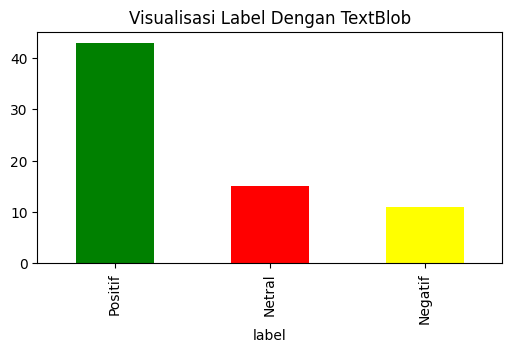

In [17]:
visualisasi_bar(df['label'], 'Visualisasi Label Dengan TextBlob')

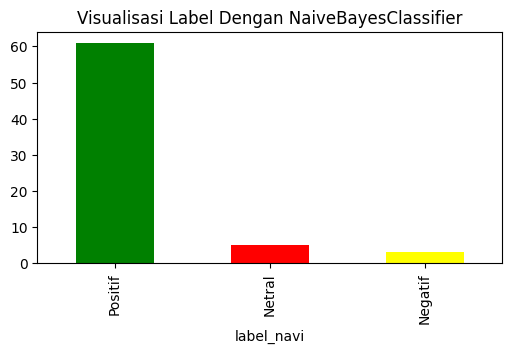

In [18]:
visualisasi_bar(df['label_navi'], 'Visualisasi Label Dengan NaiveBayesClassifier')

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [20]:
def visualisasi(wordcloud):
  plt.figure(figsize=(6,6))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)
  plt.show()

# Gabungkan semua teks menjadi satu string
all_text = ' '.join(df['stemmed_sentence'])

# Buat objek WordCloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color ='white',
    min_font_size = 10
    ).generate(all_text)

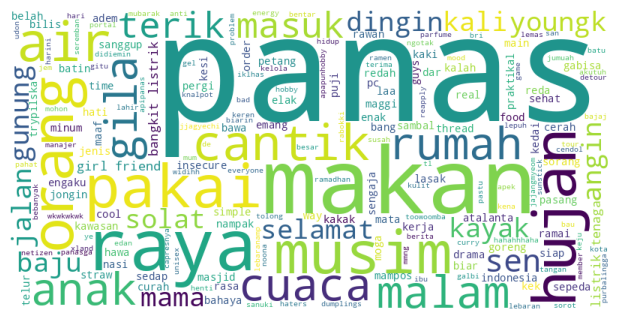

In [21]:
visualisasi(wordcloud)

# Testing

In [22]:
evaluasi = [tuple(x) for x in df.to_records(index=False)]

for n in evaluasi:
    if len(n) >= 4:
        text = n[0]
        textblob_pred = n[2]
        naivebayes_pred = n[3]

        # Periksa apakah ada perbedaan prediksi antara TextBlob dan NaiveBayes
        if textblob_pred != naivebayes_pred:
            print(f'Text: {text}\nTextBlob : {textblob_pred}\nNaiveBayes : {naivebayes_pred}\n')
        else:
            print(f'Text: {text}\nTextBlob : {textblob_pred}\nNaiveBayes : {naivebayes_pred} - No difference\n')
    else:
        print("Tuple tidak memiliki cukup elemen")


Text: keren berita portal sorot haters wkwkwkwk panas
TextBlob : Positif
NaiveBayes : Positif - No difference

Text: unisex parfume anti bau apek panas panas san a thread
TextBlob : Positif
NaiveBayes : Positif - No difference

Text: bad mood panas
TextBlob : Negatif
NaiveBayes : Positif

Text: makan sen youngk pc bang jjagyechi jajangmyeom telur keju galbi dumplings toowoomba ramen sanuki udon curry rabokki youngk makan makan panas sen didiemin bentar makan
TextBlob : Positif
NaiveBayes : Positif - No difference

Text: guys tangan ibu kayak lepuh kena apipanas
TextBlob : Netral
NaiveBayes : Positif

Text: manajer noona youngk member kerja hobby apapunhobby makan problem makan bri tolong akutuh gabisa makan panas sen biarin biar dingin gitu pc bang game makan
TextBlob : Positif
NaiveBayes : Positif - No difference

Text: tour de purbalingga hahahhhaha edan panas ngotak bawa energy gel lemas
TextBlob : Negatif
NaiveBayes : Positif

Text: mohon maaf lahir batin selamat lebaran kota panas

#Prediksi

In [23]:
def predict_sentiment(sentence, cl):
    # Melakukan prediksi sentimen menggunakan klasifikasi yang telah dilatih
    prediction = cl.classify(sentence)
    return prediction

In [28]:
# Meminta input dari pengguna
sentence_to_test = input("Masukkan kalimat yang ingin diuji: ")

# Melakukan prediksi sentimen
prediction = predict_sentiment(sentence_to_test, cl)

# Menampilkan hasil prediksi
print("Kalimat:", sentence_to_test)
print("Prediksi sentimen:", prediction)

Masukkan kalimat yang ingin diuji: bad mood
Kalimat: bad mood
Prediksi sentimen: Positif


#Saran

Agar hasil prediksi lebih baik dan akurat, sebaiknya data diperbanyak.
Dapat dilakukan dengan metode lain.